In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
#step 1 : Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['price'] = california.target
print("Dataset (first 5 rows):\n",df.head())

Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [29]:
#step 2 : EDA
print("\nData Info\n",df.info())
print("\nSummary statistics:\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Data Info
 None

Summary statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.84615

In [31]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

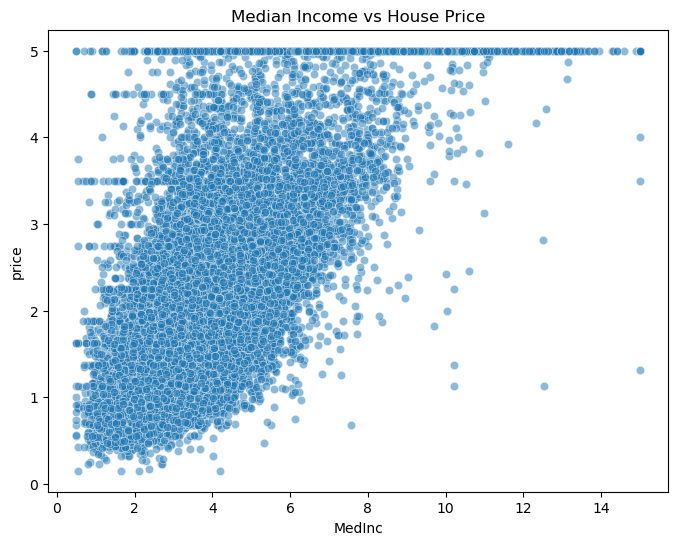

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='price',data=df,alpha=0.5)
plt.title('Median Income vs House Price')
plt.show()

In [55]:
print("\nCorrelation with price:\n",df.corr()['price'].sort_values())


Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
price         1.000000
Name: price, dtype: float64


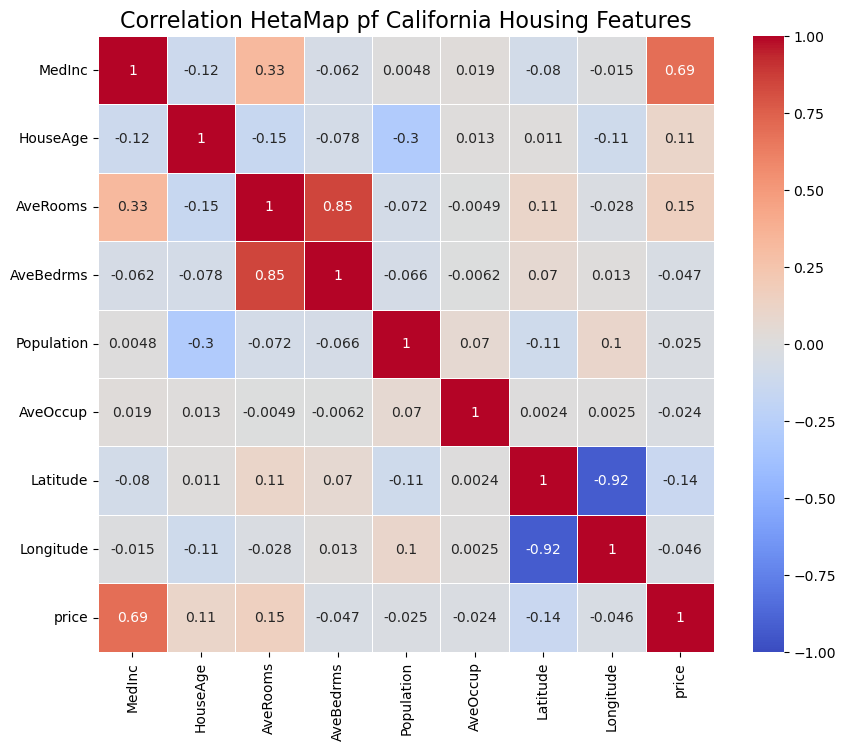

In [57]:
#calculate correlation matrix
corr_matrix = df.corr()

#set up the plot
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,vmax=1,
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Correlation HetaMap pf California Housing Features',fontsize=16)
plt.show()

In [83]:
# Prepare Data
x=df[['MedInc']]
y=df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
# Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)
print(f"\nLinear Equation : Price={model.coef_[0]:.2f}*MedInc + {model.intercept_:.2f}")


Linear Equation : Price=0.42*MedInc + 0.44


In [93]:
# predict and Evaluate
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"\nMAE : {mae:.2f} $100K")
print(f"\nrmsE : {rmse:.2f} $100K")
print(f"\nR2 : {r2:.2f}")


MAE : 0.63 $100K

rmsE : 0.84 $100K

R2 : 0.46


<function matplotlib.pyplot.show(close=None, block=None)>

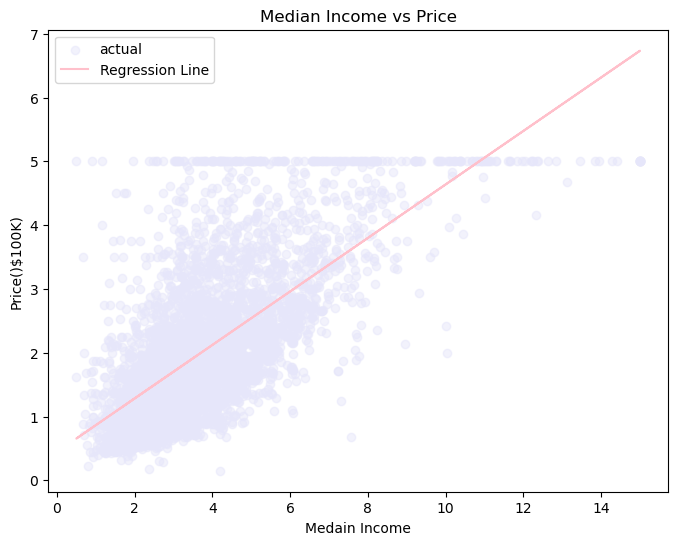

In [111]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='lavender',label='actual',alpha=0.5)
plt.plot(x_test,y_pred,color='pink',label='Regression Line')
plt.title('Median Income vs Price')
plt.xlabel('Medain Income')
plt.ylabel('Price()$100K)')
plt.legend()
plt.show